<a href="https://colab.research.google.com/github/rpizarrog/probabilidad-y-estad-stica/blob/master/2024/Caso_24_Distribumci%C3%B3n_Chi_cuadrada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivo

Objetivo
Simular variables aleatorias relacionadas con distribuciones chi cuadrada, visualizar densidad y calcualr probabildiades.

# Fundamento teórico


La distribución Chi cuadrado (distribución $\chi^2$ es una de las distribuciones más utilizadas en estadísticas para pruebas de hipótesis y análisis de datos.

Es una distribución de probabilidad fundamental en el campo de la inferencia estadística.

Una distribución chi cuadrada está muy relacionada con las distribuciones normales estandarizadas z.

La distribución Chi cuadrado es una distribución de la suma de los cuadrados de $k$ variables aleatorias normales estándar independientes.

Si $z_1$, $z_2$, ... , $z_k$ son
k variables aleatorias independientes, cada una siguiendo una distribución normal estándar
N(\mu=0,\sigma=1), entonces la variable denota como $\chi^2(k)$

$k$ Son los grados de libertad de la distribución.

$$
χ^{2} = z_1^2+z_3^2+z_3^2+z_k^2 = \sum_{k=1}^{n}z_k
$$

Una distribución Chi cuadrada con
$k$ grados de libertad, denotada como $\chi^{2}(k).

## Sus usos y aplicaciones.

* Ayuda a conceptualizar y entender la distribución Chi cuadrada como un caso particular de la transformación de variables normales estándar.
* Calcular probabilidad de una variable aleatoria continua con comportamiento de distribución chi cuadrada.
* Estimar intervalos de confianza de la variabilidad de una población.
* Facilitar el desarrollo de pruebas estadísticas, ya que la suma de cuadrados es común en métodos como la regresión lineal, ANOVA y pruebas de hipótesis.
* En análisis estadísticos complejos, donde las sumas de cuadrados surgen naturalmente, como en el análisis de varianza (ANOVA), se utilizan distribuciones Chi cuadrada para determinar *p-values* y hacer inferencias sobre los datos.
* En prueba de independencia de datos y para evaluar la hipótesis de que las categorías son independientes unas de otras.

Para efectos de este caso 25, sólo se generarán variables aleatorias chi cuadarada, se visualziará su densidad y se calcularán probabilidades.

En casos futuros se encontrará aplicaciones de pruebas de hipótesis , intervalos de confianza e independencia de datos.

## Función de densidad.

$$
f(x; k) = \frac{1}{2^{k/2} \Gamma(k/2)} x^{k/2 - 1} e^{-x/2} \quad \text{para } x > 0
$$

* $\text{para } x > 0$ significa que la variale aleatoria siempre es positiva incluyendo el cero.
* e $\approx$ 2.71828
* Γ es la función gamma, que generaliza el concepto de factorial a los números reales y complejos.
* $x$ es la variablea aleatoria
* $k$ son los grados de libertad $n-1$




## Función acumulada

La CDF (función acumulada) de una distribución Chi cuadrada se calcula generalmente mediante la integración de su función de densidad de probabilidad desde 0 hasta $x$. Se utiliza la función gamma incompleta para expresarla matemáticamente:


$$
F(x; k) = \int_0^x \frac{1}{2^{k/2} \Gamma(\frac{k}{2})} u^{\frac{k}{2} - 1} e^{-\frac{u}{2}} \, du
$$

o bien
$$
F(x; k) = \frac{\gamma(\frac{k}{2}, \frac{x}{2})}{\Gamma(\frac{k}{2})}
$$


## Funciones Python

En Python, se puede utilizar la biblioteca *scipy.stats* para trabajar con la distribución Chi cuadrad.

Las siguientes funciones específicas de *scipy.stats.chi2* para la generación de números aleatorios, cálculo de la función de densidad de probabilidad (pdf), función de distribución acumulativa (cdf), y la inversa de la función de distribución acumulativa (ppf, o percentil punto función):

* Números aleatorios (rvs): Genera números aleatorios que siguen una distribución Chi cuadrada con un número específico de grados de libertad.
* Función de densidad de probabilidad (pdf): Calcula el valor de la función de densidad de probabilidad para un valor dado de
$x$.
* Función de distribución acumulativa (cdf): Devuelve la probabilidad acumulada hasta un punto específico, lo cual es útil para calcular probabilidades de intervalos.
* Inversa de la función de distribución acumulativa (ppf): Calcula el valor de $x$ que corresponde a una probabilidad acumulada específica, lo que es útil para determinar umbrales o cuantiles.


# Desarrollo


## Cargar librerías


In [4]:
import pandas as pd
import numpy as np


from scipy.stats import chi2 # chi cuadrada
import matplotlib.pyplot as plt # Visualizar datos



## Crear funciones



In [35]:
def f_visualizar_chi_cuadrada(numeros, gl):

  numeros = np.sort(numeros)

  # Calcula la densidad PDF para los valores de x
  pdf_values = chi2.pdf(numeros, gl)

  # Crea la gráfica
  plt.figure(figsize=(8, 4))
  plt.plot(numeros, pdf_values, label=f'Chi cuadrada con {gl} grados de libertad')
  plt.title('Función de Densidad de Probabilidad de la Distribución Chi cuadrada')
  plt.xlabel('Valor')
  plt.ylabel('Densidad')
  plt.legend()
  plt.grid(True)
  plt.show()

def f_visualizar_tres_chi_cuadrada(numeros, gl):
    # Ordenar los números para asegurar continuidad en la gráfica
    numeros = np.sort(numeros)

    # Crear la figura con tres subplots en una fila
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 3 subplots, uno al lado del otro

    # Ciclar a través de cada grado de libertad y crear cada subplot
    for ax, gl in zip(axes, gl):
        # Calcular la densidad PDF para los valores de x
        pdf_values = chi2.pdf(numeros, gl)

        # Graficar la PDF
        ax.plot(numeros, pdf_values, label=f'PDF de Chi cuadrada con {gl} gl')
        # ax.fill_between(numeros, pdf_values, color='red', alpha=0.5)

        # Añadir títulos y etiquetas
        ax.set_title(f'Chi cuadrada con {gl} grados de libertad')
        ax.set_xlabel('Valor')
        ax.set_ylabel('Densidad de probabilidad')
        ax.legend()
        ax.grid(True)

    # Mostrar la figura completa
    plt.tight_layout()
    plt.show()

def f_visualizar_area_chi_cuadrada(numeros, gl, a, b):

  numeros = np.sort(numeros)

  # Calcula la densidad PDF para los valores de x
  pdf_values = chi2.pdf(numeros, gl)

  # Calcular la probabilidad acumulada entre a y b
  probabilidad = chi2.cdf(b, gl) - chi2.cdf(a, gl)

  # Crear la gráfica
  plt.figure(figsize=(8, 5))
  plt.plot(numeros, pdf_values, label=f'PDF de Chi cuadrada con {gl} gl')
  plt.fill_between(numeros, pdf_values, where=(numeros >= a) & (numeros <= b), color='red', alpha=0.5,
                     label=f'Área (Probabilidad entre {a} y {b}) = {probabilidad:.4f}')

  # Añadir títulos y etiquetas
  plt.title(f'Distribución Chi cuadrada con {gl} grados de libertad')
  plt.xlabel('Valor')
  plt.ylabel('Densidad de probabilidad')
  plt.legend()
  plt.grid(True)
  plt.show()

## Generar números aleatorios

Se generan $100$ números aleatorios de una distribución chi cuadrada a $10$ grados de libertad.




In [5]:
# Sembrar la semilla para reproducibilidad
np.random.seed(2024)

In [7]:
# Establecer los grados de libertad para la distribución Chi cuadrada
gl = 10 # grados de libertad

# Generar 100 números aleatorios siguiendo la distribución Chi cuadrada
n= 100
numeros = chi2.rvs(gl, size=n)

print("Números aleatorios Chi cuadrada:", numeros)

Números aleatorios Chi cuadrada: [10.39417422  7.77738655  9.65292237  9.04194227  8.56505798  8.33304251
  8.92421215  8.26251715  8.95694367 19.79336568  5.5361406  22.46208453
 14.76464879 21.70302387  8.20665083 10.78493008  7.61022254 14.33540259
 11.74080479  5.67963449 10.68791501  8.56325245  4.59097435  7.40979766
  8.63448036 12.39408648  6.37681148 10.78077635 10.97972993  6.74296624
  7.09035803  6.38563914  7.83976733 10.48231667  3.49024168  9.83177346
 14.26590727 10.77683493  8.64791517  8.55234849  8.68938662 15.1344372
  6.35987735  9.30922186  2.83971008  7.78787553 16.11487669  9.4114918
  8.97943097  5.84911329 15.88399751  6.82711161  7.7833126  10.10167869
  4.84365566  8.25469767  7.32000118 10.02556965  6.76052     6.28348106
 10.87774389  7.62608225  9.48655337  4.6364189   5.46843582  6.08415261
  2.41200741  8.11828274  0.98249261  1.53323646 13.96082085 13.66185973
  8.53550175 19.74041792  6.99385453  3.86281884  6.55561314  7.95044194
 12.31193187  9.3586

## Visualizar los datos

Se manda llamar la función para visualziar la densidad de los valores de la variable aleatoria chi cuadrada.


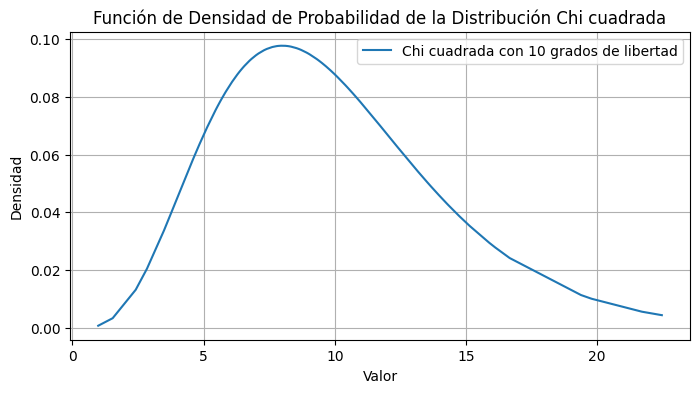

In [12]:
f_visualizar_chi_cuadrada(numeros, gl)

## Visualizar los datos a distintos grados de libertad

Se observa diferente la densidad de cada curva a distintos grados de libertdad.



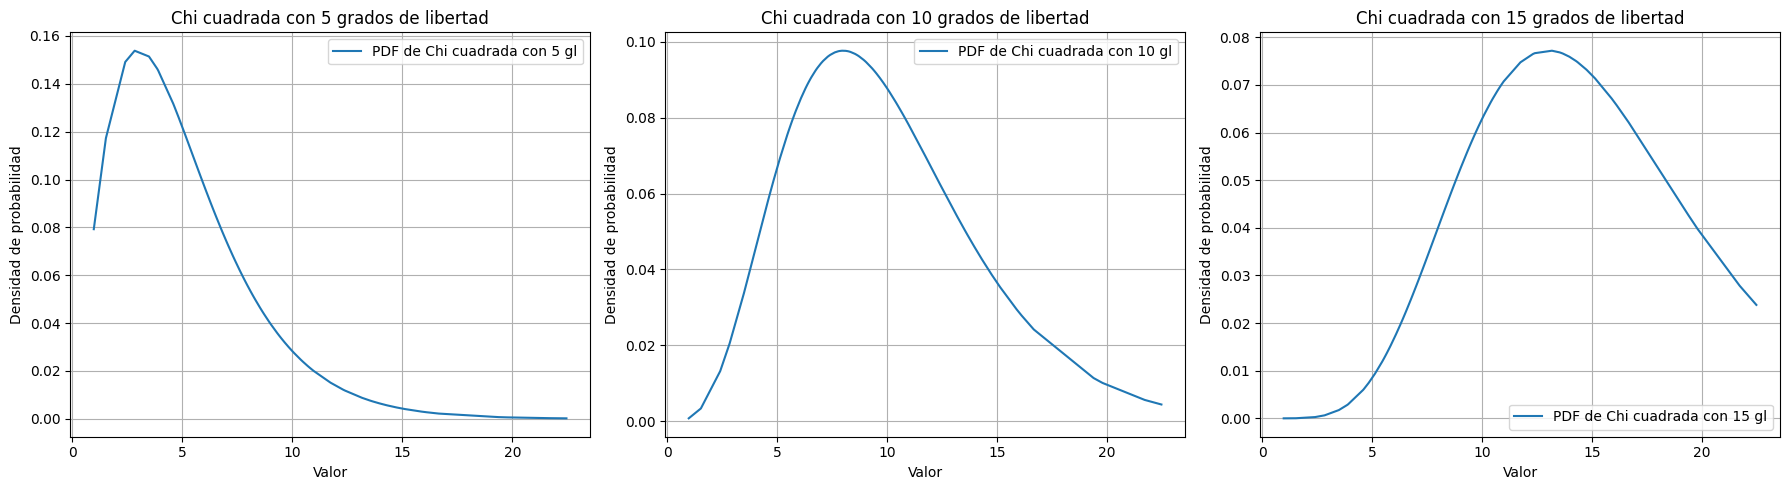

In [36]:
f_visualizar_tres_chi_cuadrada(numeros, [5, 10, 15])

## Probabilidad entre 5 y 10 a 10 gl

$$
F(5 \le x \le 10)
$$

La probabilidad de toda el área bajo la curva es $1$ o $100$$, se cacula la probabilidad de un intervalo entre $a$ y $b$.



In [15]:
a = 5
b = 10
probabilidad = chi2.cdf(b, gl) - chi2.cdf(a, gl)
print("Probabilidad entre ", a , " y ",  b, " : ", np.round(probabilidad, 4), " a ", gl, " grados de libertad")


Probabilidad entre  5  y  10  :  0.4507  a  10  grados de libertad


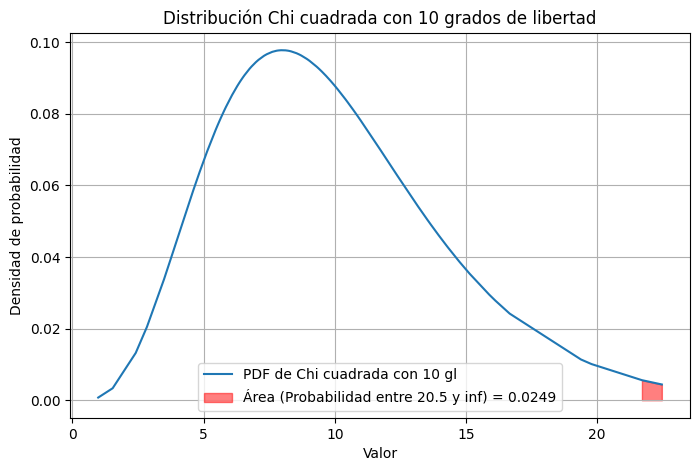

In [37]:
f_visualizar_area_chi_cuadrada(numeros, gl, a, b)

## Probabilidad entre 10.6 y 20.95 a 10 gl

$$
F(10.6 \le x \le 20.95)
$$

Probabilidad entre  10.6  y  20.95  :  0.3681  a  10  grados de libertad


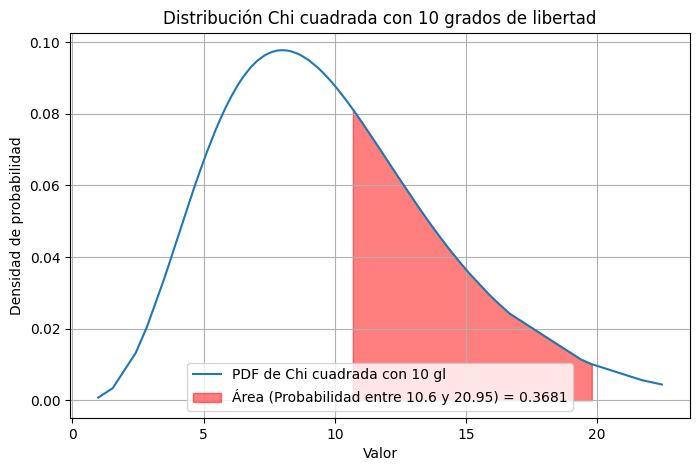

In [27]:
a = 10.6
b = 20.95
probabilidad = chi2.cdf(b, gl) - chi2.cdf(a, gl)
print("Probabilidad entre ", a , " y ",  b, " : ", np.round(probabilidad, 4), " a ", gl, " grados de libertad")
f_visualizar_area_chi_cuadrada(numeros, gl, a, b)

## Probabilidad menor a 15.5

$$
F(0 \le x \le 15.5)
$$

Probabilidad entre  0  y  15.5  :  0.8851  a  10  grados de libertad


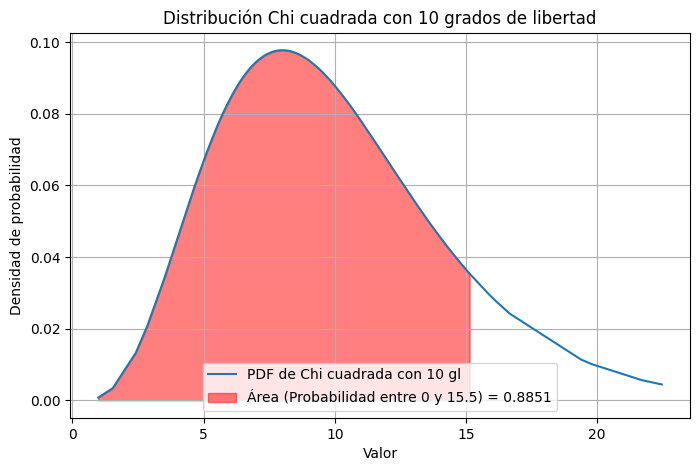

In [28]:
a = 0
b = 15.5
probabilidad = chi2.cdf(b, gl) - chi2.cdf(a, gl)
print("Probabilidad entre ", a , " y ",  b, " : ", np.round(probabilidad, 4), " a ", gl, " grados de libertad")
f_visualizar_area_chi_cuadrada(numeros, gl, a, b)

## Probabilidad mayor o igual a 25.5
F(20.5 ≤ x ≤ ∞)


Probabilidad entre  20.5  y  inf  :  0.0249  a  10  grados de libertad


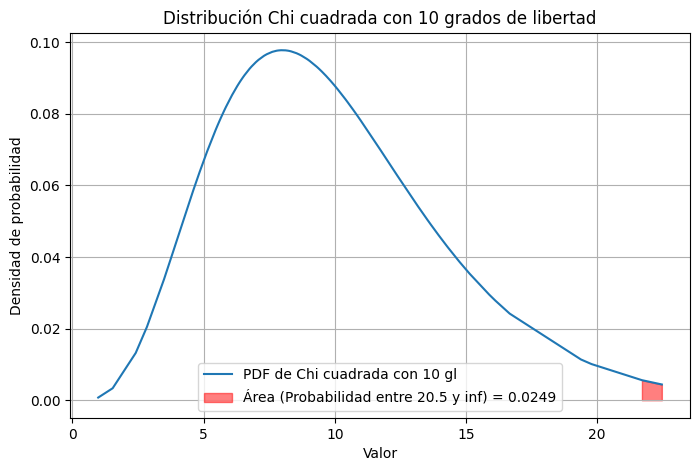

In [31]:
a = 20.5
b = np.inf
probabilidad = chi2.cdf(b, gl) - chi2.cdf(a, gl)
print("Probabilidad entre ", a , " y ",  b, " : ", np.round(probabilidad, 4), " a ", gl, " grados de libertad")
f_visualizar_area_chi_cuadrada(numeros, gl, a, b)

# Interpretación

Pendiente ...